In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
bolt_df = pd.read_csv("bolt_data.csv")

In [3]:
bolt_df.info()
bolt_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      11 non-null     float64
 1   position  11 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 304.0 bytes


,time,position
0,0.00,0
1,1.85,10
2,2.87,20
3,3.78,30
4,4.65,40


In [4]:
lm = LinearRegression()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(bolt_df["time"],
                                                    bolt_df["position"],
                                                    test_size = 0.3,
                                                    random_state = 1)

In [6]:
lm.fit(X_train.values.reshape(-1, 1), Y_train)
lm.fit_intercept = False

In [7]:
time_data = bolt_df["time"].values.reshape(-1, 1)
position_data = bolt_df["position"]

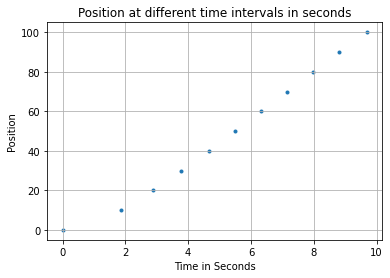

In [8]:
plt.scatter(time_data, position_data, marker='.')
plt.xlabel("Time in Seconds")
plt.ylabel("Position")
plt.title("Position at different time intervals in seconds")
plt.grid(True)
plt.show()

### Above is a Linear model of the Usain Bolt data

In [9]:
poly_fit = PolynomialFeatures(degree=3, include_bias=False, )
qm = LinearRegression()

In [10]:
quad_pipeline = make_pipeline(poly_fit, qm)
quad_pipeline.fit(time_data, position_data)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [11]:
qm.coef_

array([ 3.75096592,  1.3654344 , -0.07087901])

In [12]:
qm.intercept_

-0.30097506310929134

$f(x) =-0.07087901(x^3) +  1.3654344x^2 + 3.75096592x$

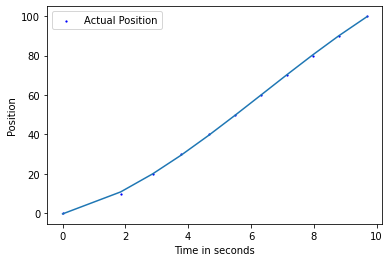

In [13]:
plt.scatter(time_data, position_data, 1.5, edgecolors="Blue", label = "Actual Position")
plt.plot(time_data, quad_pipeline.predict(time_data))
plt.xlabel("Time in seconds")
plt.ylabel("Position")
plt.legend()
plt.show()

## Above is the cubic model using a pipeline

## Next we are going to turn off fit_intercept

In [14]:
qm.fit_intercept = False

In [15]:
quad_pipe = make_pipeline(poly_fit, qm)
quad_pipe.fit(time_data, position_data)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

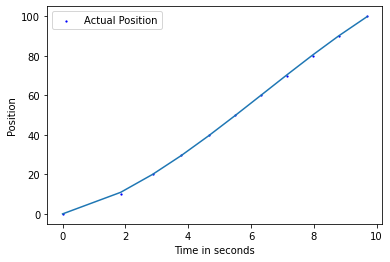

In [16]:
plt.scatter(time_data, position_data, 1.5, edgecolors="Blue", label = "Actual Position")
plt.plot(time_data, quad_pipe.predict(time_data))
plt.xlabel("Time in seconds")
plt.ylabel("Position")
plt.legend()
plt.show()